# Problem Statement: - 
A retail store in India, has its transaction data, and it would like to know the buying pattern of the 
consumers in its locality, you have been assigned this task to provide the manager with rules 
on how the placement of products needs to be there in shelves so that it can improve the buying
patterns of consumes and increase customer footfall. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ali umar hasan\Desktop\data science\Association rules\transactions_retail1.csv")

In [3]:
df.head()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
0,'LANTERN','METAL','WHITE',NaN,NaN,NaN
1,'COAT','CREAM','CUPID','HANGER','HEARTS',NaN
2,'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'
3,'HEART.','HOTTIE','RED','WHITE','WOOLLY',NaN
4,'7','BABUSHKA','BOXES','NESTING','SET',NaN


In [5]:
df.isnull().sum()

'HANGING'         0
'HEART'       18222
'HOLDER'      31241
'T-LIGHT'    120858
'WHITE'      334690
NA           473890
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

In [11]:
df["'HEART'"] = mode_imputer.fit_transform(df[["'HEART'"]])

In [17]:
df["'HOLDER'"] = mode_imputer.fit_transform(df[["'HOLDER'"]])

In [20]:
df["'T-LIGHT'"]= mode_imputer.fit_transform(df[["'T-LIGHT'"]])

In [21]:
df["'WHITE'"] = mode_imputer.fit_transform(df[["'WHITE'"]])

In [23]:
df["NA"] = mode_imputer.fit_transform(df[["NA"]])

In [24]:
df.isnull().sum()

'HANGING'    0
'HEART'      0
'HOLDER'     0
'T-LIGHT'    0
'WHITE'      0
NA           0
dtype: int64

In [25]:
#performing encoding..

In [37]:
##### One Hot Encoding works
df.columns
df = df[["'HANGING'","'HEART'","'HOLDER'","'T-LIGHT'","'WHITE'","NA"]]


from sklearn.preprocessing import OneHotEncoder
# Creating instance of One Hot Encoder
enc = OneHotEncoder() # initializing method

enc_df = pd.DataFrame(enc.fit_transform(df.iloc[:, 1:]).toarray())

In [38]:
enc_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [39]:
df = enc_df

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
"'HANGING'","'HEART'","'HOLDER'","'T-LIGHT'","'WHITE'","NA"]]

In [51]:
df = df.rename(columns={'0': 'HANGING', '1': 'HEART', '2': 'HOLDER', '3': 'T-LIGHT','4':'WHITE','5': 'NA'})

In [54]:
df

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [52]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Apriori Algorithm
Association rules with 10% Support and 70% confidence

In [53]:
# with 10% support
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.833333,(0)
1,0.166667,(1)
2,0.833333,(2)
3,0.166667,(3)
4,0.833333,(4)
...,...,...
106,0.166667,"(0, 2, 4, 6, 9)"
107,0.166667,"(0, 2, 4, 7, 8)"
108,0.166667,"(0, 2, 5, 6, 8)"
109,0.166667,"(0, 3, 4, 6, 8)"


In [42]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(2),0.833333,0.833333,0.666667,0.8,0.96,-0.027778,0.833333
1,(2),(0),0.833333,0.833333,0.666667,0.8,0.96,-0.027778,0.833333
2,(0),(3),0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667
3,(3),(0),0.166667,0.833333,0.166667,1.0,1.20,0.027778,inf
4,(0),(4),0.833333,0.833333,0.666667,0.8,0.96,-0.027778,0.833333
...,...,...,...,...,...,...,...,...,...
795,(1),"(8, 2, 4, 6)",0.166667,0.333333,0.166667,1.0,3.00,0.111111,inf
796,(2),"(8, 1, 4, 6)",0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667
797,(4),"(8, 1, 2, 6)",0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667
798,(6),"(8, 1, 2, 4)",0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667


In [32]:
# Lift Ratio > 1 ......is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


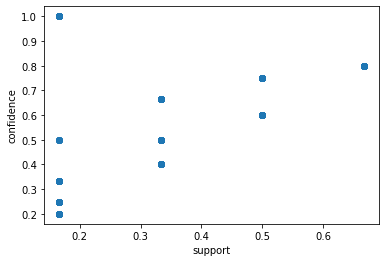

In [43]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# Association rules
with 5% Support and 90% confidence

In [56]:
# with 5% support
frequent_itemsets2=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.833333,(0)
1,0.166667,(1)
2,0.833333,(2)
3,0.166667,(3)
4,0.833333,(4)
...,...,...
106,0.166667,"(0, 2, 4, 6, 9)"
107,0.166667,"(0, 2, 4, 7, 8)"
108,0.166667,"(0, 2, 5, 6, 8)"
109,0.166667,"(0, 3, 4, 6, 8)"


In [57]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(2),0.833333,0.833333,0.666667,0.8,0.96,-0.027778,0.833333
1,(2),(0),0.833333,0.833333,0.666667,0.8,0.96,-0.027778,0.833333
2,(0),(3),0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667
3,(3),(0),0.166667,0.833333,0.166667,1.0,1.20,0.027778,inf
4,(0),(4),0.833333,0.833333,0.666667,0.8,0.96,-0.027778,0.833333
...,...,...,...,...,...,...,...,...,...
695,(1),"(8, 2, 4, 6)",0.166667,0.333333,0.166667,1.0,3.00,0.111111,inf
696,(2),"(8, 1, 4, 6)",0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667
697,(4),"(8, 1, 2, 6)",0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667
698,(6),"(8, 1, 2, 4)",0.833333,0.166667,0.166667,0.2,1.20,0.027778,1.041667


In [58]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(0),(3),0.833333,0.166667,0.166667,0.2,1.2,0.027778,1.041667
3,(3),(0),0.166667,0.833333,0.166667,1.0,1.2,0.027778,inf
6,(0),(5),0.833333,0.166667,0.166667,0.2,1.2,0.027778,1.041667
7,(5),(0),0.166667,0.833333,0.166667,1.0,1.2,0.027778,inf
10,(0),(7),0.833333,0.166667,0.166667,0.2,1.2,0.027778,1.041667
...,...,...,...,...,...,...,...,...,...
795,(1),"(8, 2, 4, 6)",0.166667,0.333333,0.166667,1.0,3.0,0.111111,inf
796,(2),"(8, 1, 4, 6)",0.833333,0.166667,0.166667,0.2,1.2,0.027778,1.041667
797,(4),"(8, 1, 2, 6)",0.833333,0.166667,0.166667,0.2,1.2,0.027778,1.041667
798,(6),"(8, 1, 2, 4)",0.833333,0.166667,0.166667,0.2,1.2,0.027778,1.041667


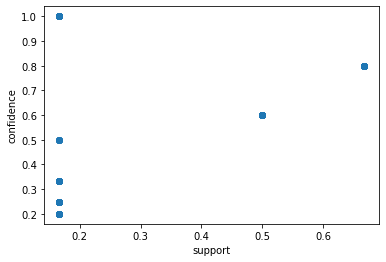

In [59]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()